Machine Learning for Image Classification
===

In which we introduce some machine learning algorithms for image classification.

# k-Nearest Neighbors

kNN is a simple machine learning algorithm that depends on distances among data points for classification. The distances are usually measured using either Manhattan distance or Euclidean distance.

## The MNIST Dataset

We load the MNIST dataset using `cv2.imread()`.

In [1]:
import cv2
import numpy as np

In [2]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [3]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [4]:
features.shape

(50, 100, 20, 20)

In [5]:
# for visualization
import matplotlib.pyplot as plt

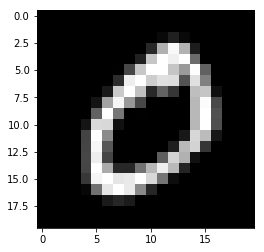

In [6]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50/50 for arithmetic convenience.

In [7]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [8]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [9]:
model = cv2.ml.KNearest_create()

### Training the kNN

When it's actually just memorizing the data points.

In [10]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [11]:
# use k = 3
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [12]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [13]:
# display the test accuracy
print('Accuracy: {}'.format(accuracy))

Accuracy: 91.64


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [14]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [15]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [16]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [17]:
features.shape

(30, 30, 28, 28)

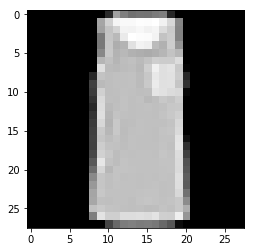

In [18]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50/50 for arithmetic convenience.

In [19]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [20]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [21]:
model = cv2.ml.KNearest_create()

### Training the kNN

When it's actually just memorizing the data points.

In [22]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [23]:
# use k = 3
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [24]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [25]:
# display the test accuracy
print('Accuracy: {}'.format(accuracy))

Accuracy: 70.88888888888889


# Support Vector Machine

Finds the hyperplane which best separates the dataset into  two classes.

## The MNIST Dataset

In [26]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [27]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [28]:
features.shape

(50, 100, 20, 20)

## Dataset Partition

Split the dataset to 50/50 for arithmetic convenience.

In [29]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [30]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

## The SVM Model

In [31]:
model = cv2.ml.SVM_create()

In [32]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [33]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [34]:
result = model.predict(test_features)

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [35]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [36]:
print('Accuracy : {}'.format(accuracy))

Accuracy : 90.44


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [37]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [38]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [39]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [40]:
features.shape

(30, 30, 28, 28)

## Dataset Partition

Split the dataset to 50/50 for arithmetic convenience.

In [41]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [42]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## The SVM Model

In [43]:
model = cv2.ml.SVM_create()

In [44]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [45]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [46]:
result = model.predict(test_features)

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [47]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [48]:
print('Accuracy : {}'.format(accuracy))

Accuracy : 74.66666666666667
